# Modelo de predicción de calidad del mineral de hierro en un proceso de minería

> ### El objetivo de este proyecto es hallar el mejor modelo para predecir la concentracion de sílice para averiguar la pureza del mineral después de pasar por una planta de flotación.

## 1. Realizamos un análisis descriptivo de los datos

In [21]:
import pickle
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import re
import time
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Vemos las distribuciones y correlaciones

> ### El dataset está bastante limpio en general, no hay valores nulos, la principal transformación que hubo que hacer fue la de transformas los datos a tipo numerico, ya que eran tipo texto. Se cambiaron las comas por puntos y todas las columnas a tipo float

In [22]:
Data = pd.read_csv("data/Dataset_definitivo.csv", index_col="Unnamed: 0")
plt.figure(figsize = (10,10))
sns.distplot(x = Data["% Silica Concentrate"])

ValueError: Index Unnamed: 0 invalid

<AxesSubplot:xlabel='% Silica Feed', ylabel='% Iron Feed'>

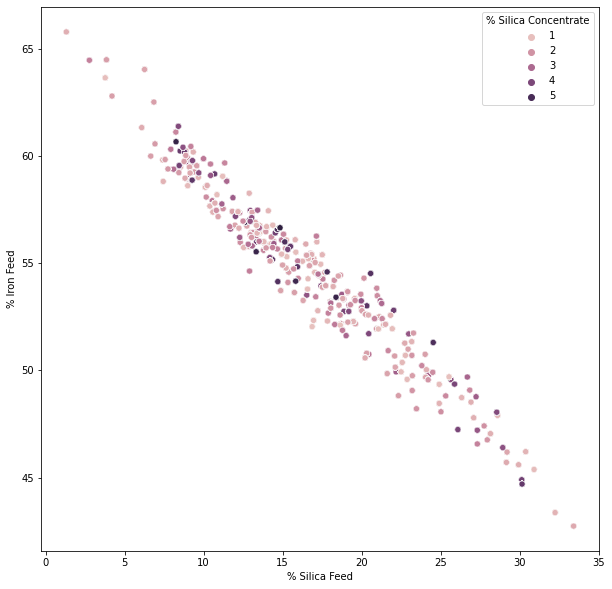

In [13]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = Data, x = "% Silica Feed", y = "% Iron Feed", hue = "% Silica Concentrate")

<AxesSubplot:xlabel='% Silica Concentrate', ylabel='% Iron Concentrate'>

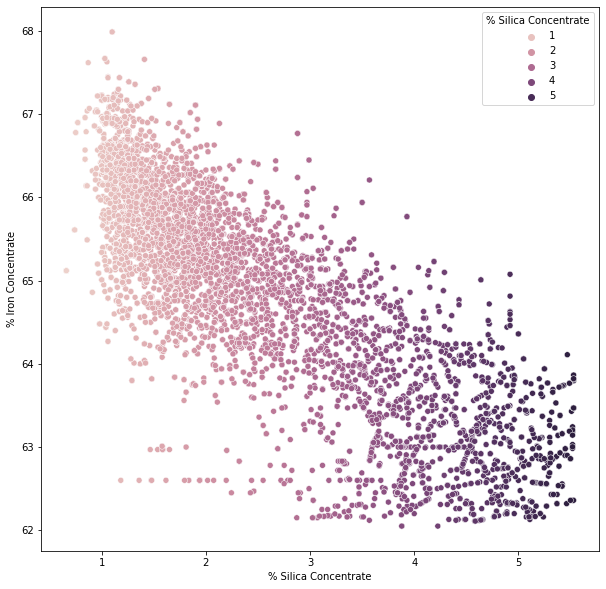

In [14]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = Data.sample(10000), x = "% Silica Concentrate", y = "% Iron Concentrate", hue = "% Silica Concentrate")

### eliminamos las columnas con mayor correlación entre ellas

In [15]:
Data.drop(columns = ["Flotation Column 07 Air Flow", "Flotation Column 02 Air Flow", "Flotation Column 03 Air Flow", "% Iron Concentrate"], inplace = True)

<AxesSubplot:>

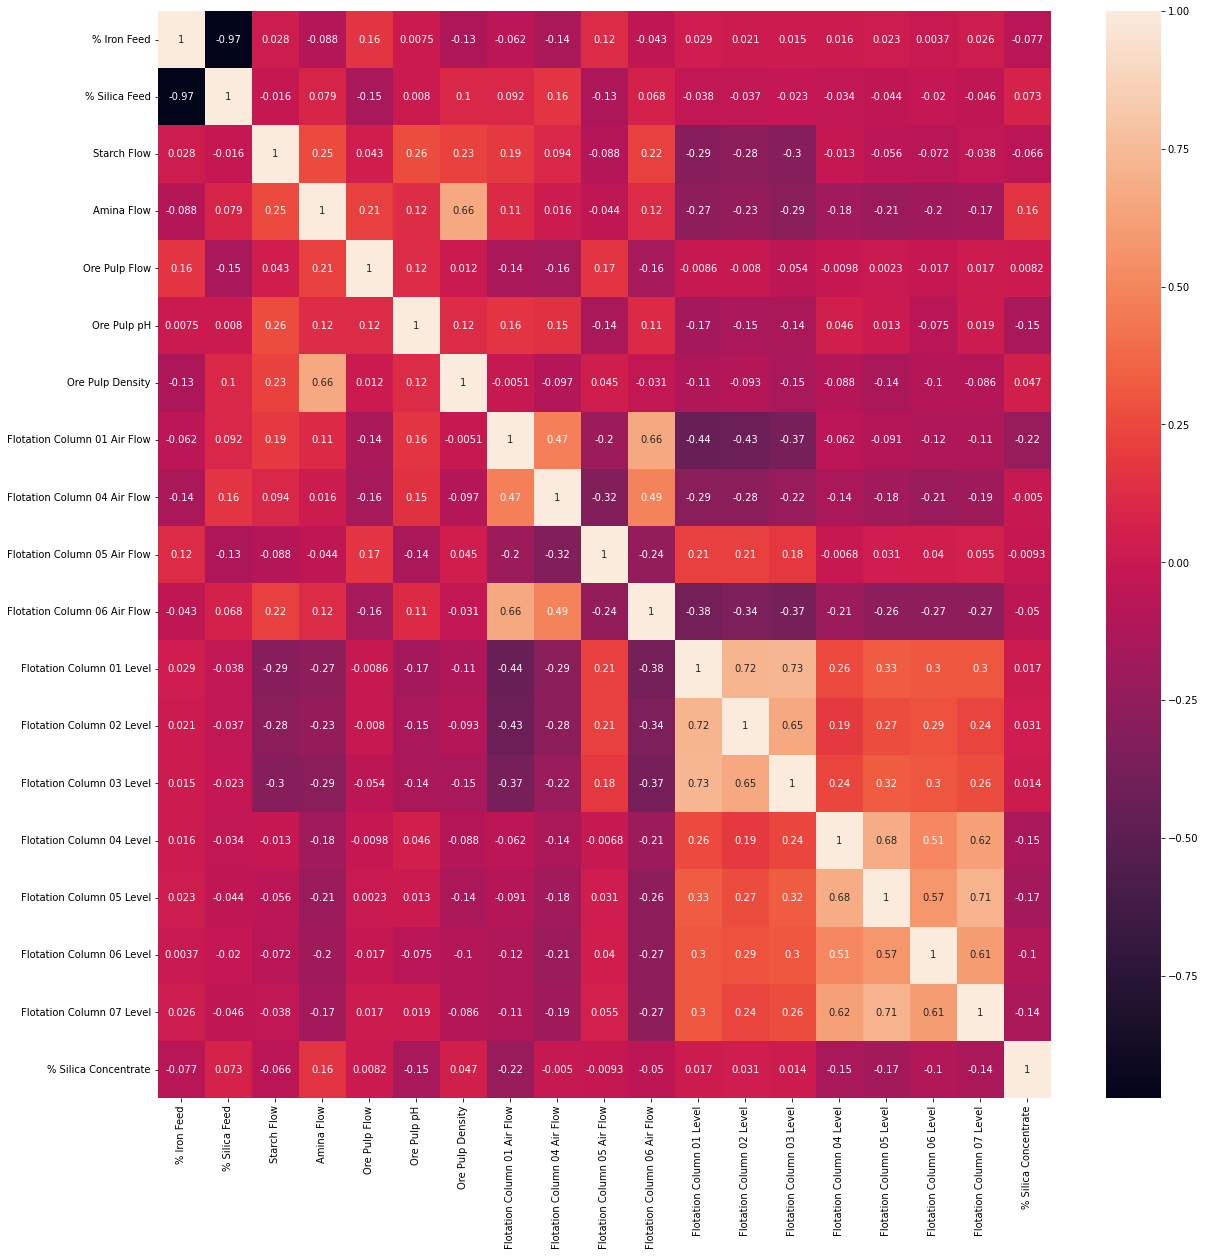

In [17]:
plt.figure(figsize = (20, 20))
sns.heatmap(Data.corr(), annot = True)

### Vemos relación entre algunas otras variables interesantes

<AxesSubplot:xlabel='Amina Flow', ylabel='Ore Pulp Density'>

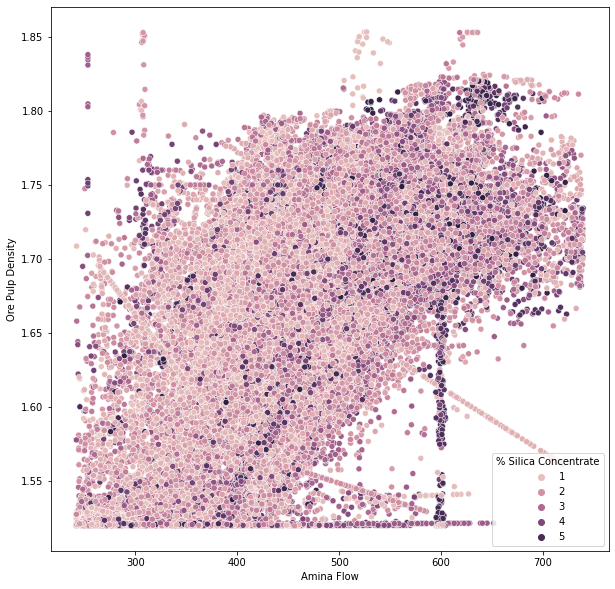

In [16]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = Data.sample(90000), x = "Amina Flow", y = "Ore Pulp Density", hue = "% Silica Concentrate")

## 2. Separamos las variables predictoras y la variable objetivo

In [ ]:
X = Data.iloc[:, :-1]
Y = Data.iloc[:, -1]
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 3)

## 3. Probamos bastantes modelos sin muchos hiperparámetros

> ### Probamos
   * Regresión Lineal
   
      ![Imagen1](Images/RegresionLineal.PNG)
      * Ridge
      
         ![Imagen1](Images/RegresionLineal.PNG)
      * Lasso
      
         ![Imagen1](Images/RegresionLineal.PNG)
      * ElasticNet

         ![Imagen1](Images/RegresionLineal.PNG)
   * Arbol de decisiones

      ![Imagen1](Images/ArbolDeDecisiones.PNG)
   * RandomForest

      ![Imagen1](Images/RandomForest.PNG)
------
### También probamos

   * ExtraTreeRegressor

   * SVC

   * KNN

   * Modelos aplicando Grid Search y Cross Validation

Al final el mejor modelo es un Random Forest que fue encontrado con un RandomSearch

![IMAGEN](Images/MejorModelo.PNG)